In [25]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D ,AveragePooling1D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
#from tensorflow.keras.optimizers import Adam


workdir = "E://Ronny_TF//Ronny_IC50_RMSE//method_comparison//dataset//ccle_exp_mut_dataset"

In [26]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


# 출처: https://3months.tistory.com/206 [Deep Play]

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18158249485501020367
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 72994816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9193560632248566592
physical_device_desc: "device: 0, name: TITAN RTX, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [27]:
dataset = np.load(workdir + "//190510_ccle_cell_gdsc_mut_drug_info.npz")
ss0 = np.load(workdir + '//190510_ccle_cell_gdsc_mut_drug_info_r0_9_1.npz')

In [28]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [29]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [30]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

1 2


In [31]:
x.shape

(8727, 23538)

In [32]:
training_image_array.shape

(7855, 23538)

In [33]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [34]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7855, 23538) (7855,) (872, 23538) (872,)


In [35]:
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [36]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (7855, 23538)
7855 train samples
872 test samples


In [37]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [38]:
# https://towardsdatascience.com/how-to-perform-ridge-and-ridge-regression-in-python-3b3b75541ad8
# https://brunch.co.kr/@itschloe1/11
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=0.0001)

ridge_regressor.fit(train_X,train_y)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2019-05-14 10:22:51.794000


C:\ProgramData\Anaconda3\envs\ronnytf\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


EndTime : 2019-05-14 10:24:07.201000


In [39]:
import matplotlib
from matplotlib import pyplot as plt

In [40]:
predicted_classes = ridge_regressor.predict(test_X)

In [41]:
predicted_value = predicted_classes

In [42]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [19]:
workdir = "E://Ronny_TF//Ronny_IC50_RMSE//method_comparison//190513_ridge_regression_w_ccle_gdsc_mut_drug"
c.to_csv(workdir + '//190513_ridge_regression_w_ccle_gdsc_mut_drug_result.csv')


In [20]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7053272706123745


In [21]:
predicted_value.shape

(872,)

In [22]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7439461955683767, intercept=0.26128131841808977, rvalue=0.8418953643538125, pvalue=2.7400034007716794e-235, stderr=0.016166967376443873)

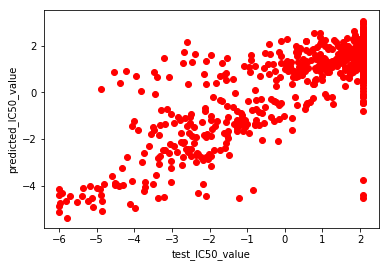

In [23]:
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//190513_ridge_regression_w_ccle_gdsc_mut_drug_test_scatterplot.png')

In [24]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.1203975812749971


In [ ]:
predicted_classes.shape

In [ ]:
test_X.shape

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
from tensorflow.keras.utils import to_categorical

In [ ]:
quan25 = np.percentile(test_label_array,25)
quan50 = np.percentile(test_label_array,50)
quan75 = np.percentile(test_label_array,75)


In [ ]:
test_class_array = []

for x in range(len(test_label_array)):
    if test_label_array[x] <= quan25:
        test_class_array.append(0)
    elif quan25 < test_label_array[x] <= quan50:
        test_class_array.append(1)
    elif quan50 < test_label_array[x] <= quan75:
        test_class_array.append(2)
    else:
        test_class_array.append(3)

print("class 1 : %i" % test_class_array.count(0))
print("class 2 : %i" % test_class_array.count(1))
print("class 3 : %i" % test_class_array.count(2))
print("class 4 : %i" % test_class_array.count(3))
test_class_array = np.asarray(test_class_array, dtype='int32', order='C')

In [ ]:
predicted_value.shape

In [ ]:
pred_class_array = []

for x in range(len(predicted_value)):
    if predicted_value[x] <= quan25:
        pred_class_array.append(0)
    elif quan25 < predicted_value[x] <= quan50:
        pred_class_array.append(1)
    elif quan50 < predicted_value[x] <= quan75:
        pred_class_array.append(2)
    else:
        pred_class_array.append(3)

print("class 1 : %i" % pred_class_array.count(0))
print("class 2 : %i" % pred_class_array.count(1))
print("class 3 : %i" % pred_class_array.count(2))
print("class 4 : %i" % pred_class_array.count(3))

pred_class_array = np.asarray(pred_class_array, dtype='int32')

In [ ]:
# correct = np.where(predicted_classes==test_label_array)[0]
# print("Found %d correct labels" % len(correct))
# for i, correct in enumerate(correct[:5]):
#     plt.subplot(3,3,i+1)
#     plt.imshow(test_X[correct].reshape(167,167), cmap='gray', interpolation='none')
#     plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_label_array[correct]))
#     plt.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i+1) for i in range(num_classes)]
print(classification_report(test_class_array, pred_class_array, target_names=target_names))

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(test_class_array[:, i], pred_class_array[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
fpr["micro"], tpr["micro"], _ = roc_curve(test_class_array.ravel(), pred_class_array.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
